## Исследовательский анализ данных и проверка гипотез относительно активности пользователей мобильных и стационарных устройств в сервисе Яндекс Афиша.

- Автор: Борисова Анна

## Цели и задачи проекта

**Цель:** Провести исследовательский анализ данных по сегментам и изучить влияние сезонности на ключевые показатели. Провести проверку гипотез относительно активности пользователей мобильных и стационарных устройств в сервисе Яндекс Афиша. Интерпретировать результаты теста и описать возможные причины получившегося результата.

**Задачи:**
1. Загрузить данные и ознакомиться с содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных, изучить и сравнить группы пользователей.
4. Провести проверку гипотез
5. Сформулировать выводы по проведенной проверке.

## Описание данных

'orders_df.csv' - таблица с информацией обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

'events_df.csv' - таблица с информацией о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

'tenge_df.csv' - таблица с информацией о курсе тенге к российскому рублю за 2024 год.

## Содержимое проекта

* [Загрузка данных и знакомство с ними](#1-bullet)
* [Проверка ошибок в данных и их предобработка](#2-bullet)
* [Исследовательский анализ данных](#3-bullet)
* [Проверка гипотез](#4-bullet)
* [Итоговые вывод](#5-bullet)

<a class="anchor" id="1-bullet"></a>
## 1. Загрузка данных и знакомство с ними

In [5]:
# Импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from datetime import timedelta
from scipy.stats import ttest_ind
from scipy import stats


In [ ]:
# Выгружаем данные в переменные
PATH = "https://.../datasets/"
try:
    final_tickets_orders_df = pd.read_csv('orders_df.csv')
    final_tickets_events_df = pd.read_csv('events_df.csv')
    final_tickets_tenge_df = pd.read_csv('tenge_df.csv')
except:
    final_tickets_orders_df = pd.read_csv(PATH + 'orders_df.csv')
    final_tickets_events_df = pd.read_csv(PATH + 'events_df.csv')
    final_tickets_tenge_df = pd.read_csv(PATH + 'tenge_df.csv')

Ознакомимся с данными датасета `orders_df.csv`:

In [ ]:
# Выводим на экран первые пять строк датафрейма
orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [ ]:
# Выводим информацию о датафрейме 
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датафрейм `orders_df` содержит 14 столбцов и 290849 строк.
После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов заданы корректно.
- Судя по первому знакомству с данными, значения в стобцах соответствуют своему описанию.
- Только в столбце `days_since_prev` имеются пропуски. Это столбец содержит информацию о количестве дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск. Так что пропуски в этом столбце ожидаемы.
- Семь столбцов имеют тип данных `object`.  Столбцы `created_dt_msk` и `created_ts_msk` содержат информацию о дате и времени создания заказа, поэтому тип `object` не подходит, его следует заменить на `datetime64`.
- Четыре столбца имеют тип данных `int64`, такой тип данных подходит.
- Три столбца имеют тип данных `float64`, такой тип данных подходит.

Ознакомимся с данными датасета `events_df.csv`:

In [ ]:
# Выводим на экран первые пять строк датафрейма
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [ ]:
# Выводим информацию о датафрейме 
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датафрейм `events_df` содержит 11 столбцов и 22427 строк.
После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов заданы корректно.
- Судя по первому знакомству с данными, значения в стобцах соответствуют своему описанию.
- В столбцах отсутсвуют пропуски.
- Восемь столбцов имеют тип данных `object`. В столбце `event_type_main` можно заменить тип данных на `category`.
- Три столбца имеют тип данных `int64`, такой тип данных подходит.

Ознакомимся с данными датасета `tenge_df.csv`:

In [ ]:
# Выводим на экран первые пять строк датафрейма
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [ ]:
# Выводим информацию о датафрейме 
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Датафрейм `tenge_df` содержит 4 столбца и 357 строк.
После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов заданы корректно.
- Судя по первому знакомству с данными, значения в стобцах соответствуют своему описанию.
- В столбцах отсутсвуют пропуски.
- Два столбца имеют тип данных `object`. В столбце `data` содержится информацию о дате заказа, поэтому тип `object` не подходит, его следует заменить на `datetime64`.
- Один столбец имеет тип данных `int64`, такой тип данных подходит.
- Один столбец имеет тип данных `float64`, такой тип данных подходит.

Первичное знакомство с данными показывает, что большая часть столбцов не содержит пропуски, пропуски есть только в одном столбце, где они ожидаемы. В четырех столбцах необходимо преобразовать тип данных на подходящий. Данные в датасетах соответсвуют описанию и выглядят корректными.

<a class="anchor" id="2-bullet"></a>
## 2. Проверка ошибок в данных и их предобработка

In [ ]:
# Соединяем данные из двух датафреймов в единый датафрейм orders_events_df
orders_events_df = orders_df.merge(events_df, on = 'event_id', how = 'left')

In [14]:
# Проверим получившийся датафрейм
orders_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

In [15]:
# Заменим тип данных с `object` на `datetime64`
orders_events_df['created_dt_msk'] = pd.to_datetime(orders_events_df['created_dt_msk'])
orders_events_df['created_ts_msk'] = pd.to_datetime(orders_events_df['created_ts_msk'])
final_tickets_tenge_df['data'] = pd.to_datetime(final_tickets_tenge_df['data'])

In [16]:
# Заменим тип данных с `object` на `category`
orders_events_df['event_type_main'] = orders_events_df['event_type_main'].astype('category')


In [17]:
# Оптимизируем целочисленный тип данных
for column in ['order_id','event_id','age_limit', 'tickets_count', 'city_id', 'venue_id']:
    orders_events_df[column] = pd.to_numeric(orders_events_df[column], downcast = 'integer')

In [18]:
# Оптимизируем вещественный тип данных
for column in ['revenue','total','days_since_prev']:
    orders_events_df[column] = pd.to_numeric(orders_events_df[column], downcast = 'float')

In [19]:
# Проверим типы данных
orders_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int32         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  datetime64[ns]
 4   event_id                290849 non-null  int32         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int8          
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int8          
 12  total                   290849

In [20]:
# Проверяем на явные дубликаты
orders_events_df.duplicated().sum()

np.int64(0)

In [21]:
# Проверяем на неявные дубликаты
orders_events_df.duplicated(subset = ['user_id', 'created_dt_msk', 'revenue', 'device_type_canonical', 'created_ts_msk', 
                                      'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'service_name', 'tickets_count', 'total', 'days_since_prev']).sum()

np.int64(30)

In [22]:
# Удалим строки с неявными дубликатами
orders_events_df = orders_events_df.drop_duplicates(subset = ['user_id', 'created_ts_msk', 'revenue', 'device_type_canonical', 'created_ts_msk', 
                                      'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'service_name', 'tickets_count', 'total', 'days_since_prev'])

In [23]:
# Убедимся, что удалили дубликаты
len(orders_events_df)

290819

Проверим распределение данных в столбцах с важными показателями. Данные представлены в разных валютах, поэтому отфильтруем данные и посмотрим распределение в рублях и тенге отдельно

In [24]:
# Фильтруем данные в рублях
rub_df = orders_events_df[(orders_events_df['currency_code'] == 'rub')]
# Проверим размер получившегося датасета
len(rub_df)

285750

In [25]:
# Изучим статистические данные
rub_df['revenue'].describe()

count    285750.000000
mean        547.590617
std         871.556472
min         -90.760000
25%         113.862500
50%         346.180000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

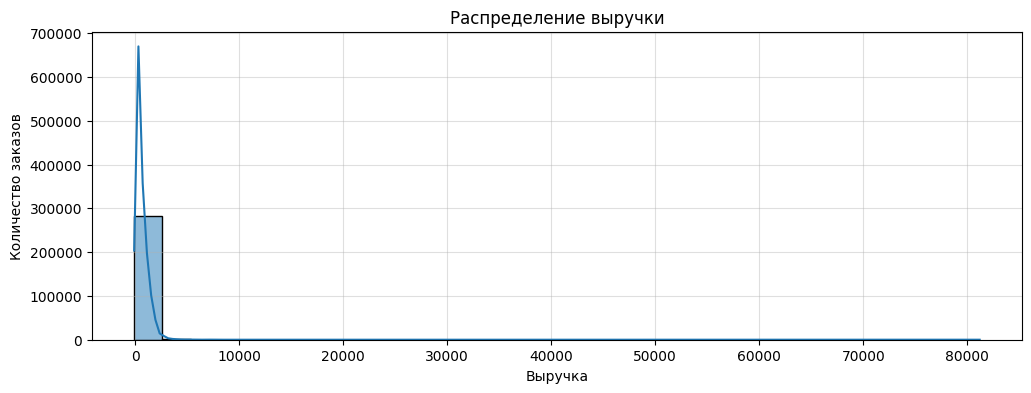

In [26]:
plt.figure(figsize=(12, 4))
sns.histplot(rub_df['revenue'], bins=30, kde=True)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.4)
plt.show()

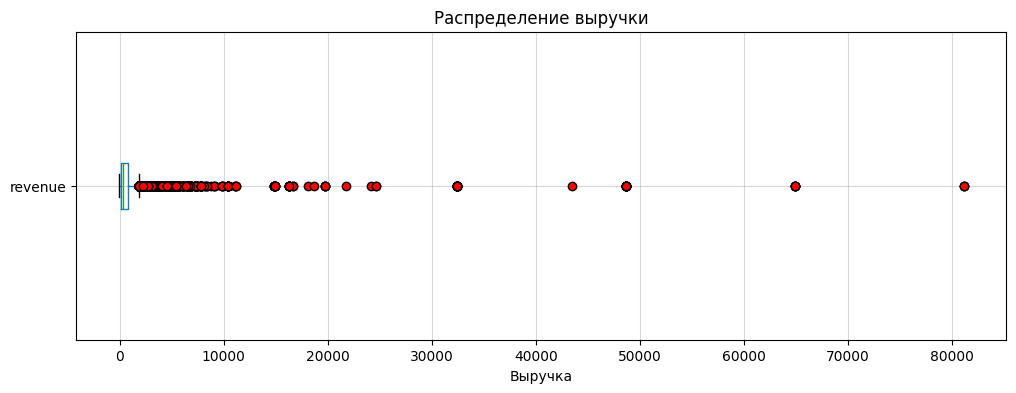

In [27]:
# Строим диаграмму размаха 
plt.figure(figsize = (12, 4))
rub_df.boxplot(column='revenue', vert = False, flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.grid(alpha = 0.5)

# Выводим график
plt.show()

В столбце `revenue` содержатся данные о выручке сервиса. Этот столбец хранит данные которые являются одним из главных показателей эффективности продукта. Данные с большим перепадом значений, есть отрицательные значения, очевидно, это возвраты средств. Так же в данных есть выделяющиеся высокие значения. Распределение выручки ассиметричное, скошено вправо.
Медианной данных является 346р, а средним значением 548р. Среднее и медианное значения отличаются друг от друга, в данных есть выбросы, а максимальное значение может являться аномальным значением. Построим диаграмму размаха, на которой сможем посмотреть распределение данных без выбросов.

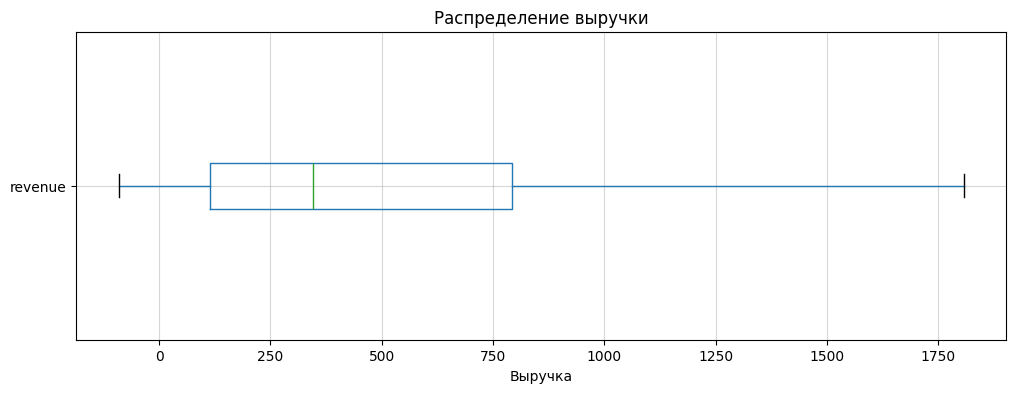

In [28]:
# Строим диаграмму размаха 
plt.figure(figsize = (12, 4))
rub_df.boxplot(column='revenue', vert = False, showfliers=False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.grid(alpha = 0.5)

# Выводим график
plt.show()

Еще одним важным показателем является количество билетов в заказе. Проверим распределение данных в стобце `tickets_count`

In [29]:
# Изучим статистические данные
rub_df['tickets_count'].describe()

count    285750.000000
mean          2.754103
std           1.171413
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

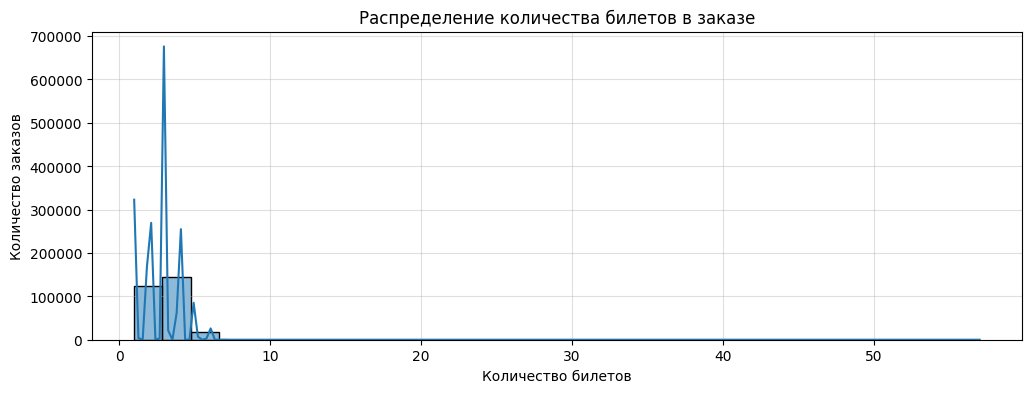

In [30]:
plt.figure(figsize=(12, 4))
sns.histplot(rub_df['tickets_count'], bins=30, kde=True)
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.4)
plt.show()

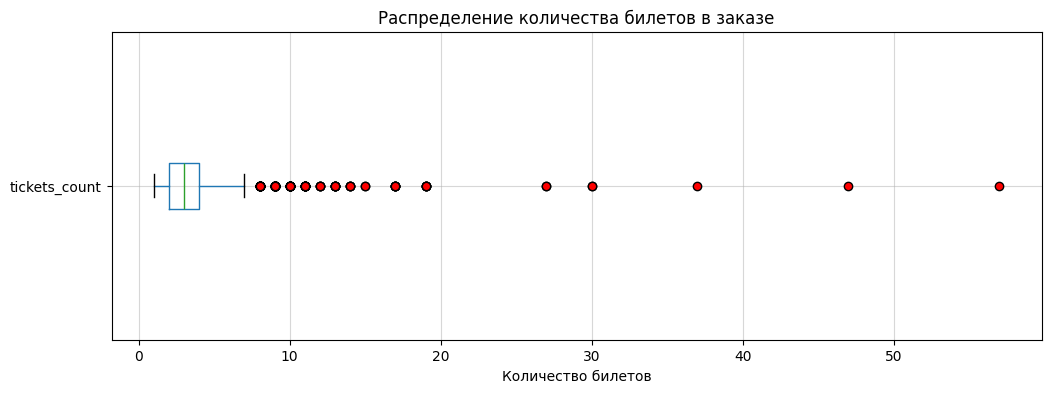

In [31]:
# Строим диаграмму размаха 
plt.figure(figsize = (12, 4))
rub_df.boxplot(column='tickets_count', vert = False, flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.grid(alpha = 0.5)

# Выводим график
plt.show()

В столбце `tickets_count` содержатся данные о количестве билетов в заказе. Этот столбец хранит данные которые являются одним из главных показателей эффективности продукта. Данные с большим перепадом значений, минимальным значением являются заказы с 1 билетом. Так же в данных есть выделяющиеся высокие значения. Распределение выручки ассиметричное, скошено вправо.
Медианной данных является 3 билета, а среднее значение 2,7 билета. Среднее и медианное значения практически не отличаются друг от друга, в данных есть выбросы, но их не так много и разброс у них не такой большой, чтобы повлиять на среднее. Максимальным является значение 57 билетов в одном заказе, что возможно. 

In [32]:
# Фильтруем данные в рублях
kzt_df = orders_events_df[(orders_events_df['currency_code'] == 'kzt')]
# Проверим размер получившегося датасета
len(kzt_df)

5069

In [33]:
# Изучим статистические данные
kzt_df['revenue'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

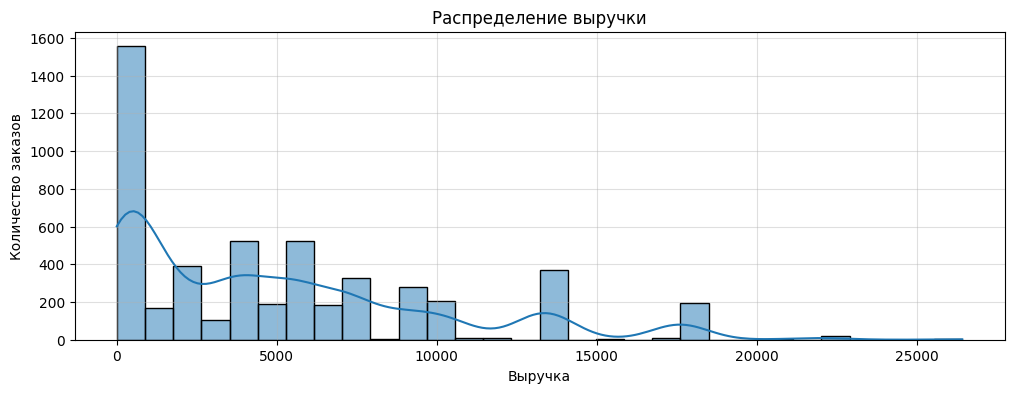

In [34]:
plt.figure(figsize=(12, 4))
sns.histplot(kzt_df['revenue'], bins=30, kde=True)
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.4)
plt.show()

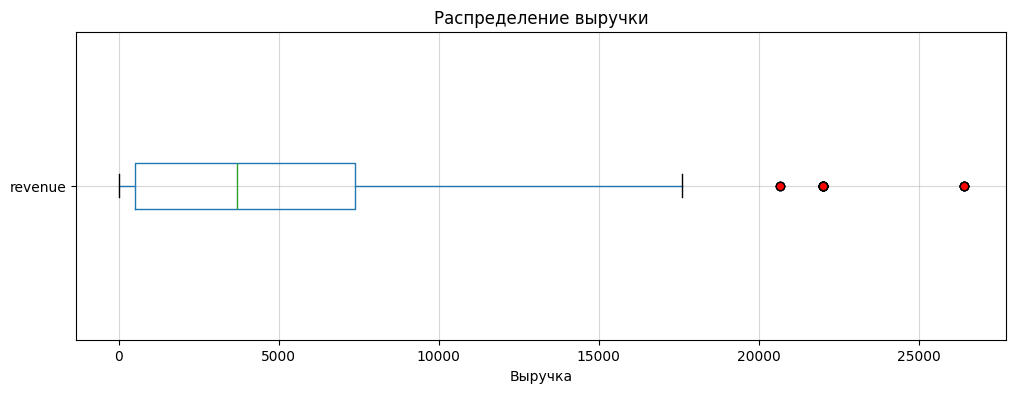

In [35]:
# Строим диаграмму размаха 
plt.figure(figsize = (12, 4))
kzt_df.boxplot(column='revenue', vert = False, flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.grid(alpha = 0.5)

# Выводим график
plt.show()

Данные в сегменте тенге так же с перепадом значений, но перепад гораздо меньше чем в рублевом, а так же отсутвуют отрицательные значения, видимо возвратов средств в этой валюте не было. Так же в данных есть выделяющиеся высокие значения. Распределение выручки ассиметричное, скошено вправо.
Медианной данных является 3699 тенге, а средним значением 4995 тенге. Среднее и медианное значения отличаются друг от друга, в данных есть выбросы.
Чтобы минимизировать влияние выбросов отфильтруем датасет по 99 процентилю в обеих валютах.

In [36]:
# Изучим статистические данные
kzt_df['tickets_count'].describe()

count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64

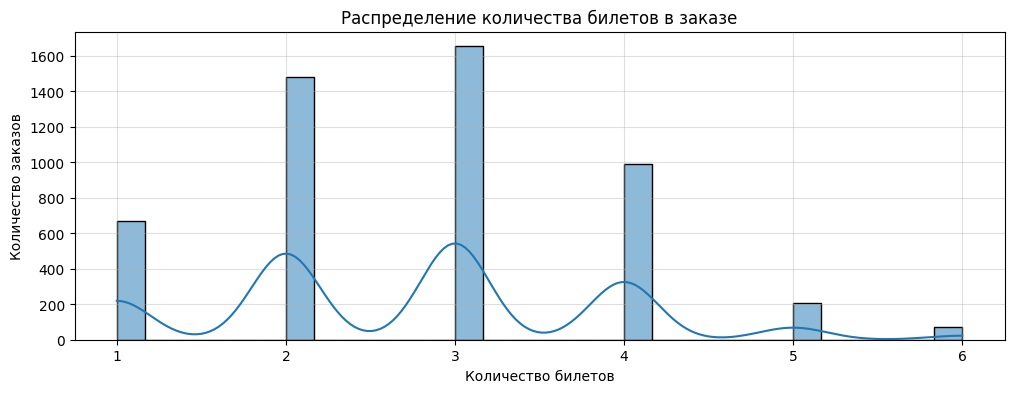

In [37]:
plt.figure(figsize=(12, 4))
sns.histplot(kzt_df['tickets_count'], bins=30, kde=True)
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.ylabel('Количество заказов')
plt.grid(alpha=0.4)
plt.show()

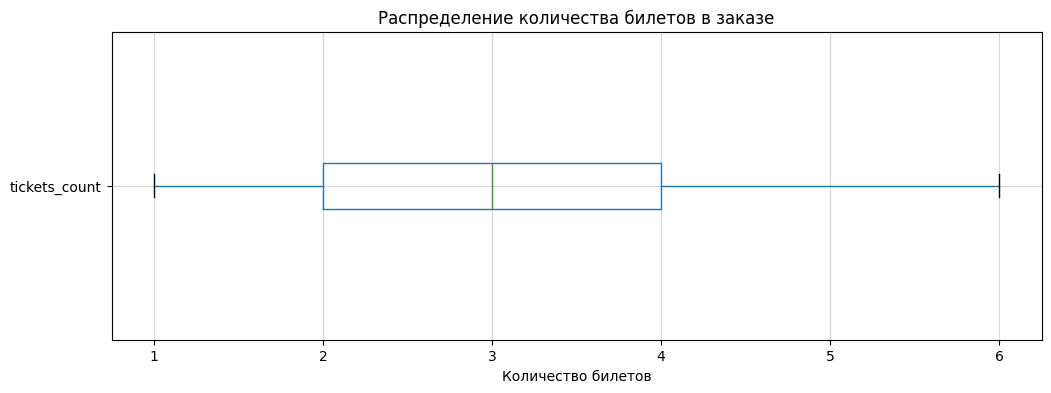

In [38]:
# Строим диаграмму размаха 
plt.figure(figsize = (12, 4))
kzt_df.boxplot(column='tickets_count', vert = False, flierprops=dict(markerfacecolor='r', marker='o'))

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в заказе')
plt.xlabel('Количество билетов')
plt.grid(alpha = 0.5)

# Выводим график
plt.show()

В столбце `tickets_count` содержатся данные о количестве билетов в заказе. В данных отсутствуют большие перепады значений, минимальным значением являются заказы с 1 билетом, а мксимальными заказы с 6 билетами. Распределение количества билетов в заказе слегка ассиметричное.

In [39]:
# отфильтруем датасет по 99 процентилю в обеих валютах
filter_rub = rub_df['revenue'].quantile(0.99)
filter_kzt = kzt_df['revenue'].quantile(0.99)

filter_df = orders_events_df[((orders_events_df['currency_code'] == 'rub') & (orders_events_df['revenue'] <= filter_rub))| ((orders_events_df['currency_code'] == 'kzt') & (orders_events_df['revenue'] <= filter_kzt))]

# Посмотрим размер получившегося датасета
print(f'Размер датасета до фильтрации {len(orders_events_df)}')
print(f'Размер датасета после фильтрации {len(filter_df)}')
print(f'Доля срезанных данных после фильтрации {round((len(orders_events_df) - len(filter_df)) / len(orders_events_df) * 100, 3)}')

Размер датасета до фильтрации 290819
Размер датасета после фильтрации 287932
Доля срезанных данных после фильтрации 0.993


In [40]:
# Соединяем данные из двух датафреймов в единый датафрейм df
df = pd.merge(filter_df, final_tickets_tenge_df, left_on = 'created_dt_msk', right_on = 'data', how = 'left')

# Проверим получившийся датасет
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt


In [41]:
# Приведем выручку к одной валюте

# Функция для конвертации выручки
def convert_to_rubles(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        return row['revenue'] * (row['curs']/100)
    else:
        return None

# Применяем функцию к датасету
df['revenue_rub'] = df.apply(convert_to_rubles, axis=1)


In [42]:
# Добавим столбец с выручкой за один билет
df['one_ticket_revenue_rub'] = df['revenue'] / df['tickets_count']

# Добавим столбец с месяцем оформления заказа
df['month'] = df['created_dt_msk'].dt.month

In [43]:
# Функция для определения сезонности
def convert_season(row):
    if row['month'] < 2 or row['month'] > 11:
        return 'зима'
    elif row['month'] > 2 and row['month'] < 6:
        return 'весна'
    elif row['month'] > 5 and row['month'] < 9:
        return 'лето'
    else:
        return 'осень'

# Применяем функцию к датасету
df['season'] = df.apply(convert_season, axis=1)
display(df)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.6972,kzt,1521.94,380.485000,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.3419,kzt,289.45,144.725000,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.6475,kzt,1258.57,314.642500,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.5010,kzt,8.49,4.245000,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.6648,kzt,1390.41,463.470000,10,осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287927,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,...,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt,965.57,241.392500,10,осень
287928,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,...,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67",2024-10-27,100,19.9266,kzt,1448.36,241.393333,10,осень
287929,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,...,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68",2024-10-30,100,19.9516,kzt,178.95,89.475000,10,осень
287930,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,...,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4",2024-09-24,100,19.3967,kzt,661.53,330.765000,9,осень


При предобработке данных были сделаны следующие пункты:

- Объединили данные в один датасет.
- В столбцах с датой заменили тип данных с `object` на `datetime64`.
- Оптимизировали данные.
- Проверили на явные и неявные дубликаты и удалили их.
- Изучили данные по выручке сервиса и по количеству билетов в заказе в разрезе двух представленных валют. 
- Отфильтровали датасет по 99 процентилю.
- Привели данные к одной валюте.
- Создали новые столбцы для последующих расчетов.

Анализ распределения ключевых показателей выявил следующие особенности:

Выручка:
В обоих валютных сегментах зафиксировано асимметричное распределение с правосторнним смещением и наличием выбросов. В рублевом сегменте присутствуют отрицательные значения выручки, что указывает на операции возврата билетов. В сегменте тенге только положительные значения выручки. Чтобы минимизировать влияние выбросов отфильтровали датасет по 99 процентилю в обеих валютах.

Количество билетов:
Распределение данных в сегментах отличается. В рублевом асимметричное распределение с правосторонним смещением и выбросами, разброс значений от 1 до 57 билетов, при этом максимальные значения не аномальны и могут быть реальными. В сегменте тенге не такой большой разброс значений от 1 до 6 билетов, данные слегка ассиметричны с правосторонним смещением, а выбросов не наблюдается.

<a class="anchor" id="3-bullet"></a>
## 3. Исследовательский анализ данных

In [44]:
# Найдем количество заказов для каждого месяца
month_orders = df.groupby('month')['order_id'].count()
display(month_orders)

month
6     34343
7     40410
8     44572
9     69333
10    99274
Name: order_id, dtype: int64

In [ ]:
# Сравним распределение заказов осеннего и летнего периодов по типам мероприятия
# Группируем данные по категориям
grouped = df.groupby('event_type_main')['season'].value_counts(normalize = True).unstack(fill_value = 0)
grouped.plot(kind = 'barh') 

# Настраиваем оформление графика
plt.xlabel('Распределение заказов')
plt.ylabel('Тип мероприятий')
plt.grid(axis='x', alpha = 0.5)
plt.legend(title = 'Период')

# Выводим график
plt.show()

Осенью заметно вырос спрос на такие мероприятия : 'Ёлки', 'Театр', 'Спорт', немного вырос спрос на 'Концерты' и 'Стендап' и практически не изменился на категории 'Другое' и 'Выставки'. 

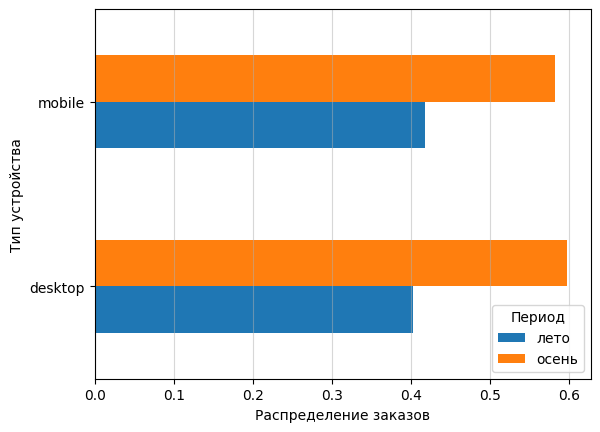

In [46]:
# Сравним распределение заказов осеннего и летнего периодов по типам устройств
# Группируем данные по категориям
grouped = df.groupby('device_type_canonical')['season'].value_counts(normalize = True).unstack(fill_value = 0)
grouped.plot(kind = 'barh') 
# Настраиваем оформление графика
plt.xlabel('Распределение заказов')
plt.ylabel('Тип устройства')
plt.grid(axis='x', alpha = 0.5)
plt.legend(title = 'Период')

# Выводим график
plt.show()

Предпочитаемый тип устройств не меняется в зависимости от сезона. И летом и осенью большая заказов производится с мобильных устройств, на такие заказы приходится практически 60% заказов. 

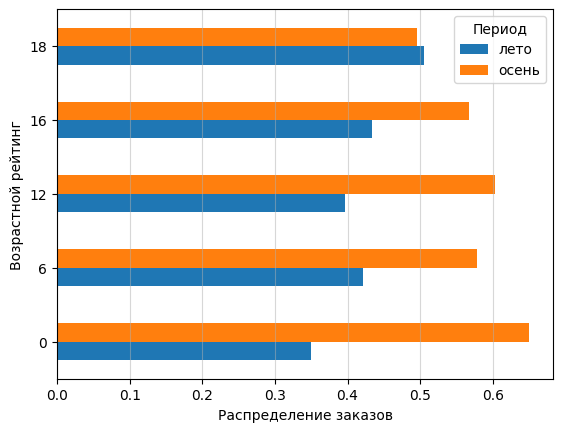

In [47]:
# Сравним распределение заказов осеннего и летнего периодов по возрастному рейтингу
# # Группируем данные по категориям
grouped = df.groupby('age_limit')['season'].value_counts(normalize = True).unstack(fill_value = 0)
grouped.plot(kind = 'barh') 
# Настраиваем оформление графика
plt.xlabel('Распределение заказов')
plt.ylabel('Возрастной рейтинг')
plt.grid(axis='x', alpha = 0.5)
plt.legend(title = 'Период')

# Выводим график
plt.show()

Практически во всех категориях возрастного рейтинга осенью существенно увеличился спрос. Только в категории от 18 и старше наблюдается еле заметный спад.

In [ ]:
# Посмотрим на изменение распределение выручки с продажи одного билета
season_revenue = df.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().unstack()

season_revenue['per_change'] = ((season_revenue['осень'] - season_revenue['лето']) / season_revenue['лето'] * 100).round(2)
season_revenue = season_revenue.sort_values('per_change', ascending = False)
display(season_revenue)

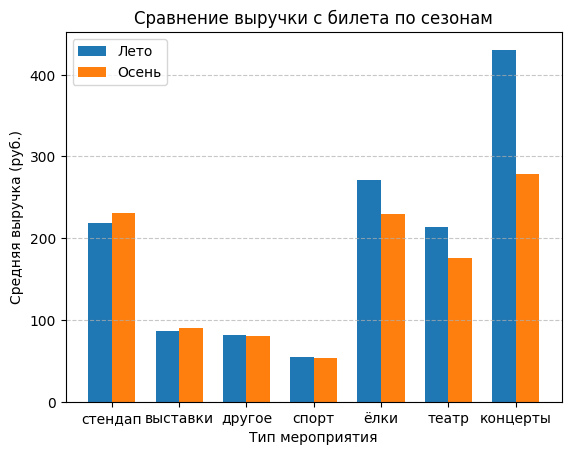

In [49]:
# Создание столбчатой диаграммы
fig, ax = plt.subplots()

# Создание двух групп столбцов для каждого сезона
width = 0.35
x = range(len(season_revenue))

# Рисуем столбцы для летнего периода
ax.bar(x, season_revenue['лето'], width, label='Лето')

# Рисуем столбцы для осеннего периода
ax.bar([i + width for i in x], season_revenue['осень'], width, label='Осень')

# Настройка подписей
plt.grid(axis = 'y', linestyle='--', alpha=0.7)
plt.title('Сравнение выручки с билета по сезонам')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка (руб.)')
ax.set_xticks([i + width/2 for i in range(len(season_revenue))])
ax.set_xticklabels(season_revenue.index)
# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Осенью выручка с одного билета просела в таких категориях как 'Ёлки', 'Театр', 'Концерты'. В этих же категориях значительно увеличелось количество продаж, скорее всего, снилизась стоимость билета, из-за чего уменьшилась выручка с одного билета, но выросла общая выручка с этих мероприятий. Не изменилась выручка за категорию 'Спорт', хотя на нее так же повысился спрос осенью. В остальных категориях выручка практически не изменилась. 
Изучим активность пользователей за осень более подробно.

In [50]:
# Отфильтруем данные
autumn_df = df[(df['season'] == 'осень')]

In [51]:
# Создаем сводную таблицу
daily_metrics = autumn_df.groupby('created_dt_msk').agg(
    total_orders=('order_id', 'count'),  # Общее число заказов
    unique_users=('user_id', 'nunique'),   # Количество уникальных пользователей (DAU)
    total_revenue=('revenue', 'sum'),  # Общая выручка
    total_tickets=('tickets_count', 'sum')  # Общее количество билетов
).reset_index()

# Рассчитываем дополнительные метрики
daily_metrics['avg_orders_per_user'] = daily_metrics['total_orders'] / daily_metrics['unique_users']
daily_metrics['avg_ticket_price'] = np.where(daily_metrics['total_tickets'] == 0, np.nan, daily_metrics['total_revenue'] / daily_metrics['total_tickets'])

# Сортируем данные по дате
daily_metrics = daily_metrics.sort_values('created_dt_msk')

display(daily_metrics)

,created_dt_msk,total_orders,unique_users,total_revenue,total_tickets,avg_orders_per_user,avg_ticket_price
0,2024-09-01,1327,564,733571.82,3718,2.352837,197.302803
1,2024-09-02,1380,574,777955.47,3704,2.404181,210.031174
2,2024-09-03,5111,778,1229176.90,15290,6.569409,80.390903
3,2024-09-04,1773,685,950093.25,4802,2.588321,197.853655
4,2024-09-05,1944,739,1106281.15,5214,2.630582,212.175134
...,...,...,...,...,...,...,...
56,2024-10-27,2849,1034,1475416.87,7867,2.755319,187.545045
57,2024-10-28,2838,985,1369752.08,7927,2.881218,172.795771
58,2024-10-29,2836,998,1372364.83,7962,2.841683,172.364334
59,2024-10-30,2928,1040,1520923.06,8064,2.815385,188.606530


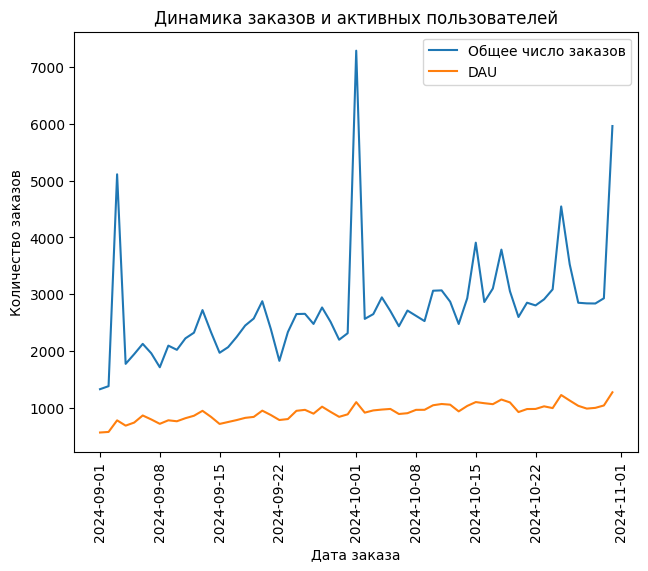

In [52]:
# Визуализация результатов
plt.figure(figsize=(16, 12))

# Общее число заказов и DAU
plt.subplot(2, 2, 1)
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['total_orders'], label='Общее число заказов')
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['unique_users'], label='DAU')
plt.title('Динамика заказов и активных пользователей')
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')
plt.xticks(rotation=90)
plt.legend()

plt.show()

Количество заказов растет с резкими колебаниями, на первой неделе месяца и в октябре и в ноябре происходят резкие скачки в общем числе заказов. DAU же показывает более плавное увеличение без резких колебаний и скачков.

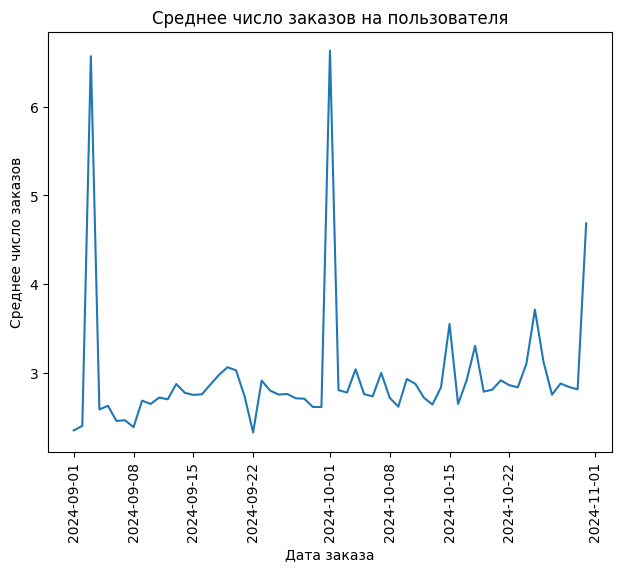

In [53]:
# Визуализируем среднее число заказов на пользователя
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['avg_orders_per_user'])
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата заказа')
plt.ylabel('Среднее число заказов')
plt.xticks(rotation=90)

plt.show()

Среднее число заказов на пользователя растет с резкими колебаниями, на первой неделе месяца и в сентябре и в октябре происходят резкие скачки. Вкупе с предыдущем графиком можно сделать вывод, что в эти недели пользователи ведут себя более активно, количество заказов увеличивает при том же количетсве пользователей. 

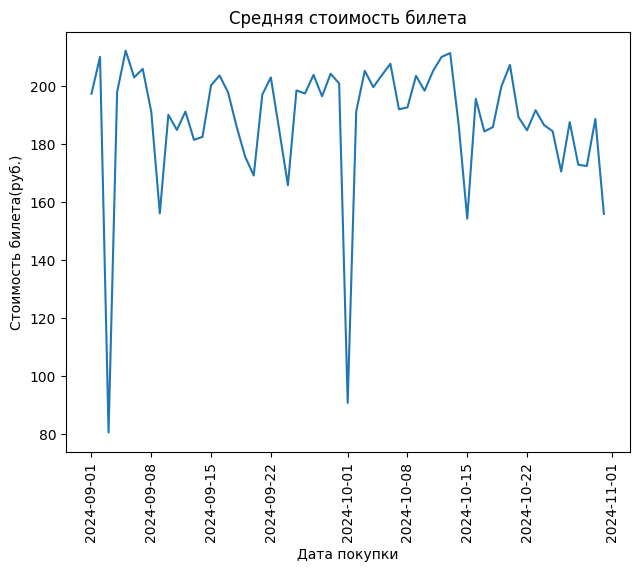

In [54]:
# Визуализируем среднюю стоимость билета
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 3)
plt.plot(daily_metrics['created_dt_msk'], daily_metrics['avg_ticket_price'])
plt.title('Средняя стоимость билета')
plt.xlabel('Дата покупки')
plt.ylabel('Стоимость билета(руб.)')
plt.xticks(rotation=90)

plt.show()

Средняя стоимость билетов не показывает явный рост или падение на выбранном временном промежутке, но колеблется, а так же имеются резкие падения в начале каждого месяца. Можно предположить, что в эти были акции или распродажи, что повлияло на рост заказов и уменьшение средней стоимости билета. 
Выделим дни недели и сравним пользовательскую активность в будни и в выходные. 

In [ ]:
# Добавляем день недели
daily_metrics['day_of_week'] = daily_metrics['created_dt_msk'].dt.dayofweek
daily_metrics['is_weekend'] = daily_metrics['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Анализ активности по дням недели
weekday_metrics = daily_metrics.groupby('is_weekend').agg(
    avg_total_orders=('total_orders', 'mean'),
    avg_unique_users=('unique_users', 'mean'),
    avg_orders_per_user=('avg_orders_per_user', 'mean'),
    avg_ticket_price=('avg_ticket_price', 'mean')
).reset_index()

# Визуализация сравнения будней и выходных
plt.figure(figsize=(12, 6))

# График сравнения
sns.barplot(
    data=weekday_metrics,
    x='is_weekend',
    y='avg_unique_users',
    palette='viridis'
)
plt.title('Сравнение активности пользователей в будни и выходные')
plt.xticks([0, 1], ['Будни', 'Выходные'])
plt.xlabel('День недели')
plt.ylabel('Среднее количество пользователей')

display(weekday_metrics)
plt.show()

В среднем, пользователи более активны в будние дни (937 пользователей) , на выходных спрос на билеты слегка падает(888 пользователей). Среднее количество заказов в будние дни составляет 2906, а в выходные 2396. 
Посмотрим как события распределены по событиям и регионам.

In [56]:
# Анализ регионов
region_metrics = autumn_df.groupby('region_name').agg(
    unique_events=('event_type_main', 'nunique'),  # Уникальные мероприятия
    total_orders=('order_id', 'count'),  # Общее число заказов
    total_revenue=('revenue', 'sum')  # Общая выручка
).reset_index()

# Добавляем доли
total_events = autumn_df['event_type_main'].nunique()
total_orders = autumn_df['order_id'].nunique()

region_metrics['event_share'] = region_metrics['unique_events'] / total_events * 100
region_metrics['order_share'] = region_metrics['total_orders'] / total_orders * 100

# Сортировка по разнообразию мероприятий
region_metrics = region_metrics.sort_values(['unique_events', 'total_orders'], ascending=False)
display(region_metrics)

,region_name,unique_events,total_orders,total_revenue,event_share,order_share
23,Каменевский регион,7,46684,28673197.27,100.000000,27.688056
59,Североярская область,7,20718,10532500.45,100.000000,12.287746
41,Медовская область,7,12044,2343985.96,100.000000,7.143238
75,Широковская область,7,8715,4227784.19,100.000000,5.168825
44,Озернинский край,7,7480,6632990.91,100.000000,4.436352
...,...,...,...,...,...,...
68,Тихогорская область,2,19,10124.84,28.571429,0.011269
55,Светолесский край,2,18,7871.89,28.571429,0.010676
78,Яснопольский округ,2,18,957.83,28.571429,0.010676
5,Верхозёрский край,2,11,2180.02,28.571429,0.006524


In [ ]:
# Отфильтруем топ регионов с наибольшим разнообразием мероприятий
filter_region_metrics = region_metrics[(region_metrics['unique_events'] > 6)]
# Визуализация регионов
plt.figure(figsize=(12, 6))
sns.barplot(
    data = filter_region_metrics,
    y='region_name',
    x='order_share',
    palette='crest_r'
    
)
plt.title('Доля заказов по регионам c наибольшим разнообразием мероприятий')
plt.ylabel('Регионы')
plt.xlabel('Доля от общего числа заказов (%)')

plt.show()

Наибольшее разнообразие мероприятий предлагают 16 регионов. Наиболее востребованым является Каменевский регион, на него приходится 28% от всех заказов. Второй по популярности является Североярская область, 12% от всех заказов приходится на эту область. Остальные регионы сильно отстают по количеству заказов.

In [58]:
# Анализ билетных операторов
partner_metrics = autumn_df.groupby('service_name').agg(
    unique_events=('event_type_main', 'nunique'),  # Уникальные мероприятия
    total_orders=('order_id', 'count'),  # Общее число заказов
    total_revenue=('revenue', 'sum')  # Общая выручка
).reset_index()

# Добавляем доли
partner_metrics['event_share'] = partner_metrics['unique_events'] / total_events * 100
partner_metrics['order_share'] = partner_metrics['total_orders'] / total_orders * 100
partner_metrics['revenue_share'] = partner_metrics['total_revenue'] / autumn_df['revenue'].sum() * 100

# Сортировка по выручке
partner_metrics = partner_metrics.sort_values('total_revenue', ascending=False)
display(partner_metrics.head(10))

,service_name,unique_events,total_orders,total_revenue,event_share,order_share,revenue_share
3,Билеты без проблем,7,32383,13538511.75,100.000000,19.206201,16.107998
24,Мой билет,7,19419,11636878.48,100.000000,11.517315,13.845452
25,Облачко,7,15478,10611051.69,100.000000,9.179927,12.624933
21,Лови билет!,7,25792,10376793.48,100.000000,15.297111,12.346215
8,Весь в билетах,7,9406,9325570.66,100.000000,5.578653,11.095479
5,Билеты в руки,7,25734,7613965.50,100.000000,15.262712,9.059027
19,Край билетов,4,2997,3018372.54,57.142857,1.777506,3.591232
34,Яблоко,7,3473,2763332.31,100.000000,2.059820,3.287788
26,Прачечная,7,5798,2548310.47,100.000000,3.438766,3.031957
30,Тебе билет!,7,3749,2137900.34,100.000000,2.223514,2.543654


In [ ]:
# Визуализация билетных операторов
plt.figure(figsize=(12, 6))

# Основные метрики 
sns.barplot(
    data=partner_metrics.head(10),  # Топ-10 партнеров
    y ='service_name',
    x ='total_revenue',
    palette='crest_r'
)
plt.title('Выручка по билетным операторам')
plt.xlabel('Суммарная выручка (руб.)')
plt.ylabel('Билетный оператор')

plt.show()

Самый большой показатель по общей выручке наблюдается у билетного оператора 'Билеты без проблем' и составляет 13,5 млн.руб. Вторым по выручке является оператор 'Мой билет', его выручка составляет 11,6 млн.руб.

<a class="anchor" id="4-bullet"></a>
## 4. Проверка гипотез

In [60]:
# Разделим данные на две группы
mobile_users = autumn_df[(autumn_df['device_type_canonical'] == 'mobile')]
desktop_users = autumn_df[(autumn_df['device_type_canonical'] == 'desktop')]

In [61]:
# Посчитаем количество пользователей
user_sample_a = mobile_users['user_id'].nunique()
user_sample_b = desktop_users['user_id'].nunique()
print(f"Количество пользователей в группе 'mobile' - {user_sample_a}. Количество пользователей в группе 'desktop' - {user_sample_b}")

Количество пользователей в группе 'mobile' - 14190. Количество пользователей в группе 'desktop' - 4869


In [62]:
# Рассчитываем количество пользователей, которые встречаются одновременно в двух группах
user_sample_a = mobile_users['user_id']
user_sample_b = desktop_users['user_id']
intersection = list(set(user_sample_a) & set(user_sample_b))
print(f"Количество пользователей попавших в обе группы одновременно - {len(intersection)}")

Количество пользователей попавших в обе группы одновременно - 3250


In [63]:
# Удаляем пользователей которые есть в обеих группах одновременно
filter_autumn_df = autumn_df[~autumn_df['user_id'].isin(intersection)] 
print(f"Размер датафрейма после удаления - {len(filter_autumn_df)}")

Размер датафрейма после удаления - 34469


In [64]:
# Разделим данные на две группы
mobile_users = filter_autumn_df[(filter_autumn_df['device_type_canonical'] == 'mobile')]
desktop_users = filter_autumn_df[(filter_autumn_df['device_type_canonical'] == 'desktop')]
# Рассчитываем количество уникальных пользователей
user_sample_a = mobile_users['user_id'].nunique()
user_sample_b = desktop_users['user_id'].nunique()
print(f"Количество пользователей в группе 'mobile' - {user_sample_a}. Количество пользователей в группе 'desktop' - {user_sample_b}")

Количество пользователей в группе 'mobile' - 10940. Количество пользователей в группе 'desktop' - 1619


- Между группами наблюдается существенный дисбаланс в количестве пользователей. В группе 'mobile' 10940 пользователей, а в группе 'desktop'  1619.
- Для сравнения выборок применим t-тест Уэлча, поскольку наблюдается существенный дисбаланс в размерах тестовых групп.

Проверим гипотезу о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств:

- Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя мобильного приложения и пользователя стационарных устройств не различается или статистически не важно.

- Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно.

In [65]:
# Для мобильных пользователей
mobile_orders = mobile_users.groupby('user_id').agg(
    total_orders=('order_id', 'nunique')
).reset_index()

# Для стационарных пользователей
desktop_orders = desktop_users.groupby('user_id').agg(
    total_orders=('order_id', 'nunique')
).reset_index()

# Проверим средние значения
print(f"Среднее количество заказов на мобильного пользователя: {mobile_orders['total_orders'].mean():.2f}")
print(f"Среднее количество заказов на стационарного пользователя: {desktop_orders['total_orders'].mean():.2f}")

# Проведем t-тест Уэлча
alpha = 0.05

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    mobile_orders['total_orders'],
    desktop_orders['total_orders'],
    equal_var=False,
    alternative='greater'
)

# Интерпретация результатов
if p_value_welch_ttest > alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Интерпретация: Среднее количество заказов на одного пользователя мобильного приложения и пользователя стационарных устройств не различается или статистически не важно.')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения!')
    print('Интерпретация: Среднее количество заказов на одного пользователя мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно')

Среднее количество заказов на мобильного пользователя: 2.86
Среднее количество заказов на стационарного пользователя: 1.97
p-value теста Уэлча =0.0
Нулевая гипотеза не находит подтверждения!
Интерпретация: Среднее количество заказов на одного пользователя мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно


In [66]:
# Отфильтруем данные 
active_users_df = filter_autumn_df[(filter_autumn_df['days_since_prev'] >= 1)]
print(f'Размер получившегося датасета - {len(active_users_df)}')

Размер получившегося датасета - 13539


In [67]:
# Разделим данные на две группы
mobile_users = active_users_df[(active_users_df['device_type_canonical'] == 'mobile')]
desktop_users = active_users_df[(active_users_df['device_type_canonical'] == 'desktop')]

# Рассчитываем количество уникальных пользователей
user_sample_a = mobile_users['user_id'].nunique()
user_sample_b = desktop_users['user_id'].nunique()
print(f"Количество пользователей в группе 'mobile' - {user_sample_a}. Количество пользователей в группе 'desktop' - {user_sample_b}")

Количество пользователей в группе 'mobile' - 5753. Количество пользователей в группе 'desktop' - 620


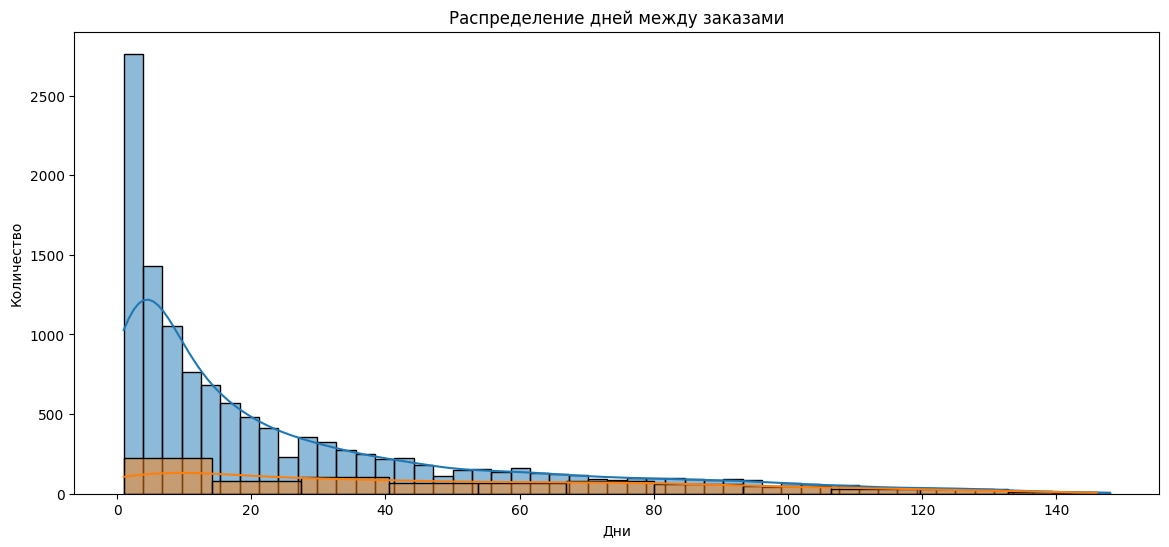

In [68]:
# Визуализируем распределения для выбора теста
plt.figure(figsize=(14, 6))

# График для мобильных
sns.histplot(mobile_users['days_since_prev'], kde=True)
# График для стационарных
sns.histplot(desktop_users['days_since_prev'], kde=True)
plt.title('Распределение дней между заказами')
plt.xlabel('Дни')
plt.ylabel('Количество')

plt.show()

Распределения имеют ассиметричный вид с правым хвостом, но форма распределения сильно отличается. Для сравнения выборок применим t-тест Уэлча, поскольку наблюдается существенный дисбаланс в размерах тестовых групп

Проверим гипотезу о том, что среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств:

- Нулевая гипотеза H₀: Среднее время между заказами пользователей мобильных приложений и пользователей стационарных устройств не различается или статистически не важно.

- Альтернативная гипотеза H₁: Среднее время между заказами пользователей мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно.

In [69]:
# Рассчитываем количество уникальных пользователей
user_sample_a = mobile_users['days_since_prev']
user_sample_b = desktop_users['days_since_prev']

alpha = 0.05

# t-тест Уэлча
stat_welch_ttest, p_value_welch_ttest = stats.ttest_ind(
    user_sample_a,
    user_sample_b,
    equal_var=False,
    alternative='greater'
)


# Интерпретация результатов
if p_value_welch_ttest > alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение!')
    print('Интерпретация: Среднее время между заказами пользователей мобильных приложений и пользователей стационарных устройств не различается или статистически не важно.')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения!')
    print('Интерпретация: Среднее время между заказами пользователей мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно')

p-value теста Уэлча =1.0
Нулевая гипотеза находит подтверждение!
Интерпретация: Среднее время между заказами пользователей мобильных приложений и пользователей стационарных устройств не различается или статистически не важно.


<a class="anchor" id="5-bullet"></a>
## 5. Итоговые выводы

- В ходе исследования проанализировали данные из трех датасетов. В одном из датасетов был стобец с пропускоми, однако эти пропуски были ожидаемы.
- В двух датасетах необходимо было заменить тип данных в столбцах где представлена информация о датах с `object` на `datetime64`. Всего таких столбцов было 3.
- В одном столбце необходимо было заменить тип данных с `object` на `category`

По итогам исследовательского анализа выявлено что:

- Сезонность заметна практически во всех показателях.
- Осенью заметно вырос спрос на мероприятия : 'Ёлки', 'Театр' и 'Спорт'. 
- Предпочитаемый тип устройств не меняется в зависимости от сезона. И летом и осенью большая заказов производится с мобильных устройств, на такие заказы приходится практически 60% заказов. 
- Осенью выручка с одного билета просела в таких категориях как 'Ёлки', 'Театр', 'Концерты'. Однако, в этих же категориях значительно увеличилось количество продаж. Не изменилась выручка за категорию 'Спорт', хотя на нее так же повысился спрос осенью.
- Количество заказов осенью растет с резкими колебаниями, на первой неделе месяца и в октябре и в ноябре происходят резкие скачки в общем числе заказов. DAU же показывает более плавное увеличение без резких колебаний и скачков.
- Осенью среднее количество заказов на пользователя так же растет с резкими колебаниями, на первой неделе месяца и в сентябре и в октябре происходят резкие скачки. Можно сделать вывод, что в эти недели пользователи ведут себя более активно, количество заказов увеличивает при том же количетсве пользователей.
- Средняя стоимость билетов не показывает явный рост или падение на выбранном временном промежутке, но колеблется, а так же имеются резкие падения в начале каждого месяца. Можно предположить, что в эти были акции или распродажи, что повлияло на рост заказов и уменьшение средней стоимости билета. Выделим дни недели и сравним пользовательскую активность в будни и в выходные.
- В среднем, пользователи более активны в будние дни (937 пользователей), на выходных спрос на билеты слегка падает(888 пользователей). Среднее количество заказов в будние дни составляет 2906, а в выходные 2396.
- Наибольшее разнообразие мероприятий предлагают 16 регионов, в них продают билеты на 7 разных типов мероприятий. Наиболее востребованым является Каменевский регион, на него приходится 28% от всех заказов. Второй по популярности является Североярская область, 12% от всех заказов приходится на эту область. Остальные регионы сильно отстают по количеству заказов.
- Самый большой показатель по общей выручке наблюдается у билетного оператора 'Билеты без проблем' и составляет 13,5 млн.руб. Вторым по выручке является оператор 'Мой билет', его выручка составляет 11,6 млн.руб.

Были проверены две гипотезы, по результатам котрых выявлено, что:

- Среднее количество заказов на одного пользователя мобильного приложения выше чем у пользователей стационарных устройств и это различие статистически важно
- Среднее время между заказами пользователей мобильных приложений и пользователей стационарных устройств не различается или статистически не важно.

Рекомендации:

- Разработать специальные акции или маркетинговые активности на популярные направления, в которых заметен рост покупок: 'Ёлки', 'Театр', 'Концерты'. Не направленные на снижение стоимости билета, так как итак наблюдается снижение выручки с билета при росте количества продаж.
- Заняться продвижением мероприятий в наиболее активных регионах, таких как Каменевский регион и Североярская область. При этом проанализировать потенциал других регионов в которых наблюдается разнообразие мероприятий(таких регионов еще 14).
- Оптимизировать мобильное приложение, так как 60% заказов приходится на мобильные устройства и так как среднее количество заказов на одного пользователя мобильного приложения выше чем у пользователей стационарных устройств. А так же проанализировать поведение таких пользователей для улучшения сервиса. 
- Усилить активность маркетинга в будние дни, когда пользователи более вовлечены и активны.
- Укрепить сотрудничество с ведущими билетными операторами 'Билеты без проблем' и 'Мой билет'. А так же с 'Лови букет!' и 'Билеты в руки', эти операторы хоть и уступают по общей выручке, но являются популярными и по количеству продаж билетов обходят оператора 'Мой билет'.